# Bulldozer Price Prediction Machine Learning Project

#### This project aims to predict the price of buldozers put up for option based on Specification factors.

**Data**

This project uses data obtained from Kaggle's Blue book for Bulldozers competition:
https://www.kaggle.com/c/bluebook-for-bulldozers/data
It features multiple training and test set that have already be split for immediate use and benchmarks for gauging our performance.

**Evaluation:**

Our metric of success is the RMSLE or root mean squared log error. 
We want to post a RMSLE smaller than the median benchmark provided by kaggle minimize it RMSLE as much as possible.

**Features**

* SalesID: the uniue identifier of the sale
* MachineID: the unique identifier of a machine.  A machine can be sold multiple times
* saleprice: what the machine sold for at auction (only provided in train.csv)
* saledate: the date of the sale



## Data Exploration (EDA)

#### Exploring the data features prior to modelling and testing.

In [3]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [6]:
train_validation_df = pd.read_csv('C:\\Users\\fritz\\Documents\\DataBases\\bluebook-for-bulldozers\\TrainAndValid.csv',
                                 low_memory=False)
train_validation_df.shape

(412698, 53)

In [7]:
train_validation_df.head(5)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
train_validation_df.dtypes

SalesID                       int64
SalePrice                   float64
MachineID                     int64
ModelID                       int64
datasource                    int64
auctioneerID                float64
YearMade                      int64
MachineHoursCurrentMeter    float64
UsageBand                    object
saledate                     object
fiModelDesc                  object
fiBaseModel                  object
fiSecondaryDesc              object
fiModelSeries                object
fiModelDescriptor            object
ProductSize                  object
fiProductClassDesc           object
state                        object
ProductGroup                 object
ProductGroupDesc             object
Drive_System                 object
Enclosure                    object
Forks                        object
Pad_Type                     object
Ride_Control                 object
Stick                        object
Transmission                 object
Turbocharged                

 Most of our data is object type and we have a datetime column that hasn't been parsed.
    
After reloading the data set with parsed dates, we need to seriously consider how we will break down these categorical object columns.

In [15]:
train_validation_df = pd.read_csv('C:\\Users\\fritz\\Documents\\DataBases\\bluebook-for-bulldozers\\TrainAndValid.csv',
                                 low_memory=False,
                                 parse_dates=['saledate'])
train_validation_df.saledate[:5]

0   2006-11-16
1   2004-03-26
2   2004-02-26
3   2011-05-19
4   2009-07-23
Name: saledate, dtype: datetime64[ns]

In [16]:
# The saledate column has been cleaned, let's see if there are null values
train_validation_df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

<AxesSubplot:xlabel='saledate', ylabel='SalePrice'>

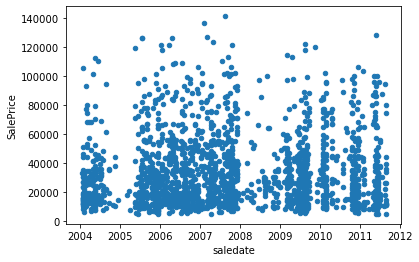

In [22]:
train_validation_df[:2000].plot.scatter(x='saledate', y='SalePrice')

In [26]:
# Let's create a more detailed datetime info
test_df = train_validation_df.copy()
test_df['saleyear']= test_df.saledate.dt.year
test_df['salemonth']= test_df.saledate.dt.month
test_df['salequarter'] =test_df.saledate.dt.quarter
test_df['salequarterend'] =test_df.saledate.dt.is_quarter_end
test_df['salequarterstart'] =test_df.saledate.dt.is_quarter_start

In [31]:
# We still have many object type columns that need to be converted into a data type sklearn can process.
for label, value in test_df.items():
    if value.dtype == object:
        test_df[label] = value.astype('category')
test_df.dtypes

SalesID                              int64
SalePrice                          float64
MachineID                            int64
ModelID                              int64
datasource                           int64
auctioneerID                       float64
YearMade                             int64
MachineHoursCurrentMeter           float64
UsageBand                         category
saledate                    datetime64[ns]
fiModelDesc                       category
fiBaseModel                       category
fiSecondaryDesc                   category
fiModelSeries                     category
fiModelDescriptor                 category
ProductSize                       category
fiProductClassDesc                category
state                             category
ProductGroup                      category
ProductGroupDesc                  category
Drive_System                      category
Enclosure                         category
Forks                             category
Pad_Type   

In [34]:
# Just in case, we are going to convert salequarterend and salequarterstart into numeric
test_df['salequarterend'].loc[test_df['salequarterend']==True]=1
test_df['salequarterend'].loc[test_df['salequarterend']==False]=0
test_df['salequarterstart'].loc[test_df['salequarterstart']==True]=1
test_df['salequarterstart'].loc[test_df['salequarterstart']==False]=0
# These were converted into object type and need to be converted to int
test_df[['salequarterstart', 'salequarterend']] = test_df[['salequarterstart', 'salequarterend']].astype('int')
test_df['salequarterstart'][:5],test_df['salequarterend'][:5]

(0    0
 1    0
 2    0
 3    0
 4    0
 Name: salequarterstart, dtype: int32,
 0    0
 1    0
 2    0
 3    0
 4    0
 Name: salequarterend, dtype: int32)